In [16]:
from qiskit import *

In [53]:
def zplg(i1, i2, i3, i4, i5):
    qc = QuantumCircuit(7,5)
    
    if i1 == '1':
        qc.x(0)
    if i2 == '1':
        qc.x(1)
    if i3 == '1':
        qc.x(2) 
    if i4 == '1':
        qc.x(3)
    if i5 == '1':
        qc.x(4)
    
    qc.barrier()
    
    #A xor D
    qc.cx(3 ,0)
    qc.measure(0, 0)
    qc.barrier()
    
    #A xor B xor D
    qc.cx(0, 1)
    qc.cx(3, 1)
    qc.measure(1, 1)
    qc.barrier()
    
    #A xor B xor C xor D
    qc.cx(0, 2)
    qc.cx(1, 2)
    qc.cx(3, 2)
    qc.measure(2, 2)
    qc.barrier()
    
    #(A xor D)(B xor C) xor BC xor D
    qc.cx(0, 3)
    qc.cx(1, 2)
    qc.ccx(2, 3, 5)
    qc.ccx(1, 2, 3)
    qc.cx(3, 5)
    qc.measure(3, 3)
    qc.barrier()
    
    #(A xor D)(B xor C) xor BC' xor D xor E
    qc.cx(0, 3)
    qc.cx(1, 2)
    qc.cswap(2, 3, 6)
    qc.x(2)
    qc.ccx(1, 2, 3)
    qc.cx(6, 3)
    qc.cx(3, 4)
    qc.measure(4, 4)
    qc.barrier()
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1, memory = True)
    output = job.result().get_memory()[0]
    
    return qc, output

input is  0 0 0 0 0 output is  00000
input is  0 0 0 0 1 output is  10000
input is  0 0 0 1 0 output is  10001
input is  0 0 0 1 1 output is  00001
-------------------------------------
input is  0 0 1 0 0 output is  00100
input is  0 0 1 0 1 output is  10100
input is  0 0 1 1 0 output is  10101
input is  0 0 1 1 1 output is  00101
-------------------------------------
input is  0 1 0 0 0 output is  00110
input is  0 1 0 0 1 output is  10110
input is  0 1 0 1 0 output is  10111
input is  0 1 0 1 1 output is  00111
-------------------------------------
input is  0 1 1 0 0 output is  01010
input is  0 1 1 0 1 output is  11010
input is  0 1 1 1 0 output is  11011
input is  0 1 1 1 1 output is  01011
-------------------------------------
input is  1 0 0 0 0 output is  00011
input is  1 0 0 0 1 output is  10011
input is  1 0 0 1 0 output is  10010
input is  1 0 0 1 1 output is  00010
-------------------------------------
input is  1 0 1 0 0 output is  01111
input is  1 0 1 0 1 output is  11

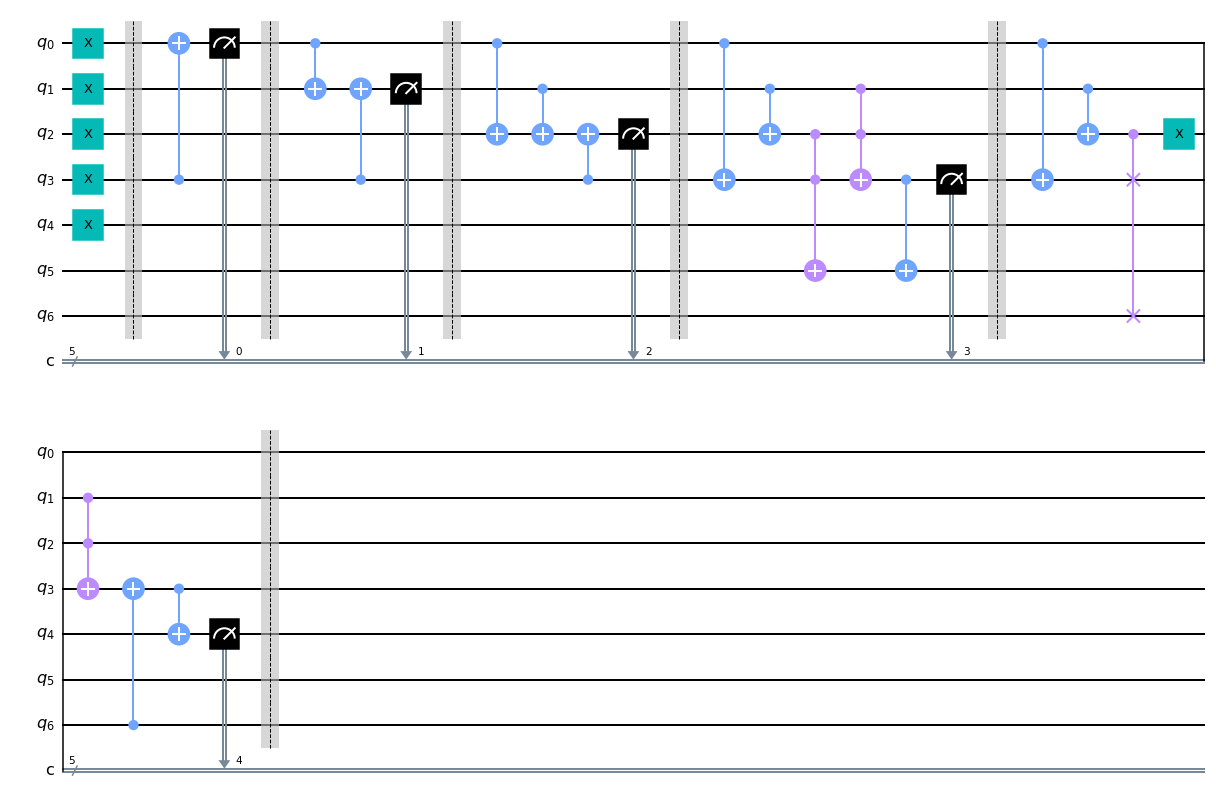

In [54]:
for i1 in ['0', '1']:
    for i2 in ['0', '1']:
        for i3 in ['0', '1']:
            for i4 in ['0', '1']:
                for i5 in ['0', '1']:
                    qc, output = zplg(i1, i2, i3, i4, i5)
                    print("input is ", i1, i2, i3, i4, i5, "output is ", output )
            print("-------------------------------------")
qc.draw('mpl')

In [62]:
from math import pi
theta = pi
qc = QuantumCircuit(3)
qc.cp(theta,1, 2)
qc.cx(0, 1)
qc.cp(-theta,1, 2)
qc.cx(0, 1)
qc.cp(theta, 0, 2)
qc.draw()

q_0: ──────────■─────────────■─────■────
             ┌─┴─┐         ┌─┴─┐   │    
q_1: ───■────┤ X ├────■────┤ X ├───┼────
     ┌──┴───┐└───┘┌───┴───┐└───┘┌──┴───┐
q_2: ┤ P(π) ├─────┤ P(-π) ├─────┤ P(π) ├
     └──────┘     └───────┘     └──────┘

In [67]:
def tf(inp1, inp2, inp3):
    qc = QuantumCircuit(3,3)
    
    if(inp1 == '1'):
        qc.x(0)
    if(inp2 == '1'):
        qc.x(1)
    if(inp3 == '1'):
        qc.x(2)
        
    theta = pi
    qc.cp(theta,1, 2)
    qc.cx(0, 1)
    qc.cp(-theta,1, 2)
    qc.cx(0, 1)
    qc.cp(theta, 0, 2)  
    
    qc.measure(0, 0)
    qc.measure(1, 1)
    qc.measure(2, 2)
    qc.draw()
    
    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots = 1, memory= True)
    output = job.result().get_memory()[0]
    
    return qc, output

In [68]:
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        for inp3 in ['0', '1']:
            qc, output = tf(inp1, inp2, inp3)
            print('{} {} {}'.format(inp1, inp2, inp3), '=', output)
display(qc.draw())

0 0 0 = 000
0 0 1 = 100
0 1 0 = 010
0 1 1 = 110
1 0 0 = 001
1 0 1 = 101
1 1 0 = 011
1 1 1 = 111


┌───┐                                      ┌─┐   
q_0: ┤ X ├──────────■─────────────■─────■───────┤M├───
     ├───┤        ┌─┴─┐         ┌─┴─┐   │    ┌─┐└╥┘   
q_1: ┤ X ├───■────┤ X ├────■────┤ X ├───┼────┤M├─╫────
     ├───┤┌──┴───┐└───┘┌───┴───┐└───┘┌──┴───┐└╥┘ ║ ┌─┐
q_2: ┤ X ├┤ P(π) ├─────┤ P(-π) ├─────┤ P(π) ├─╫──╫─┤M├
     └───┘└──────┘     └───────┘     └──────┘ ║  ║ └╥┘
c: 3/═════════════════════════════════════════╩══╩══╩═
                                              1  0  2